In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('dataset.csv').drop(['CustomerID','Gender'], axis=1)
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [2]:
#split data
data1 = data.drop(['Annual Income (k$)'],axis=1)
data2 = data.drop(['Spending Score (1-100)'],axis=1)
data3 = data.drop(['Age'],axis=1)

# print(data1,data2,data3)

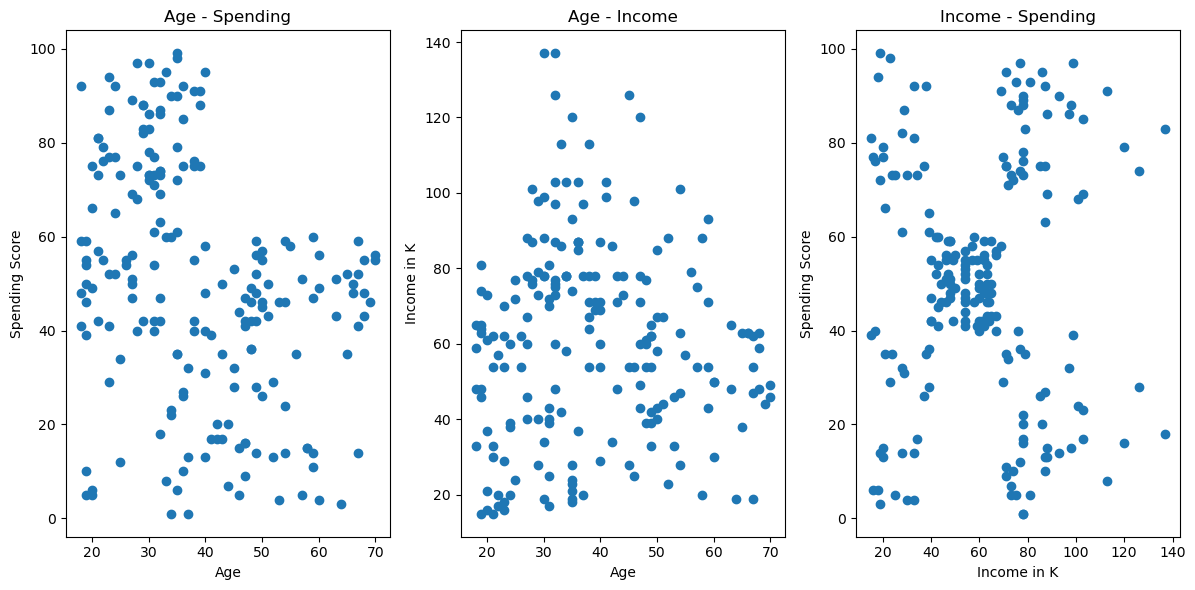

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols = 3,figsize=(12, 6))
ax[0].scatter(data1['Age'], data1['Spending Score (1-100)'])
ax[0].set_title('Age - Spending')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Spending Score')

ax[1].scatter(data2['Age'], data2['Annual Income (k$)'])
ax[1].set_title('Age - Income')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Income in K')

ax[2].scatter(data3['Annual Income (k$)'], data3['Spending Score (1-100)'])
ax[2].set_title('Income - Spending')
ax[2].set_xlabel('Income in K')
ax[2].set_ylabel('Spending Score')

plt.tight_layout()
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data1 = pd.DataFrame(scaler.fit_transform(data1))
data2 = pd.DataFrame(scaler.fit_transform(data2))
data3 = pd.DataFrame(scaler.fit_transform(data3))

In [5]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

inertias = [[],[],[]]

for i in range(1,11):
    km1 = KMeans(n_clusters=i)
    km1.fit(data1)
    km2 = KMeans(n_clusters=i)
    km2.fit(data2)
    km3 = KMeans(n_clusters=i)
    km3.fit(data3)
    
    inertias[0].append(km1.inertia_)
    inertias[1].append(km2.inertia_)
    inertias[2].append(km3.inertia_)

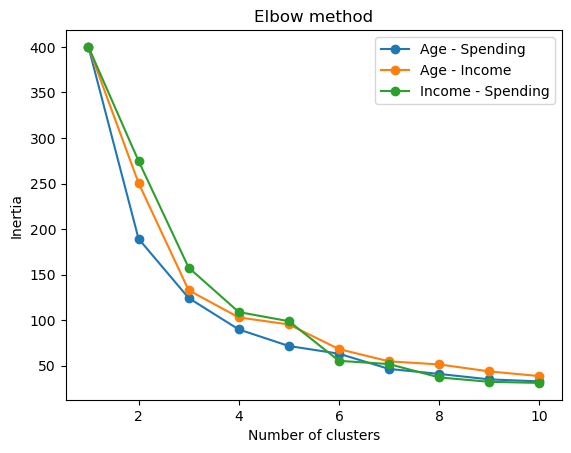

In [6]:
plt.plot(range(1,11), inertias[0], label='Age - Spending',marker='o')
plt.plot(range(1,11), inertias[1], label='Age - Income',marker='o')
plt.plot(range(1,11), inertias[2], label='Income - Spending',marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.legend()
plt.show()

In [16]:
def init_centroid(data):
    indices = np.random.choice(data1.shape[0], 3, replace=False)
    return data.values[indices]

def assign_clusters(data,centroids):
    distances = np.linalg.norm(data[:, np.newaxis, :] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(data, labels):
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(3)])
    return new_centroids

def plot_kmeans(data, centroids, labels, iteration):
    colors = np.array(['red', 'green', 'blue'])
    plt.figure(figsize=(2,2))
    plt.scatter(data[: ,0], data[ :,1], c=colors[labels], s=1, alpha=0.4)
    plt.scatter(centroids[:, 0], centroids[:, 1], c=colors, s=10)
    plt.title(f'Iteration {iteration}', fontsize=8)
    plt.tick_params(
        axis='both',          # Apply to both x and y axes
        which='both',         # Both major and minor ticks
        left=False,           # Hide left axis
        bottom=False,         # Hide bottom axis
        top=False,            # Hide top axis
        labelbottom=False ,    # Hide tick labels on the bottom axis
        labelleft=False
    )
    plt.show()
    
def iter(data):
    centroids = init_centroid(data)
    data = data.values
    i = 0
    while True:
        labels = assign_clusters(data, centroids)
        plot_kmeans(data, centroids, labels, i + 1)
        new_centroids = update_centroids(data, labels)
        if np.all(centroids == new_centroids):
            convergence_point = i+1
            break
        centroids = new_centroids
        i +=1
    print(f"Convergence Reached at Iteration",convergence_point)


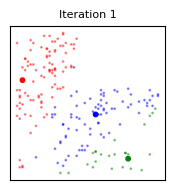

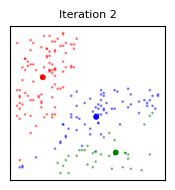

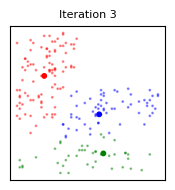

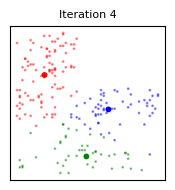

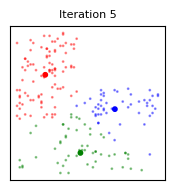

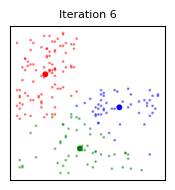

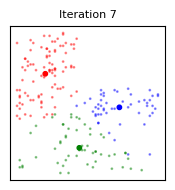

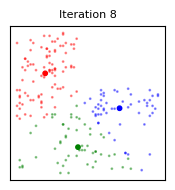

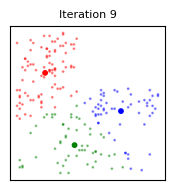

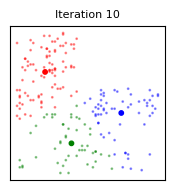

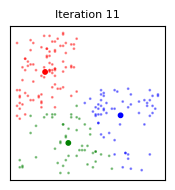

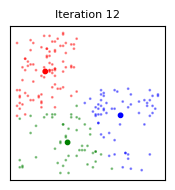

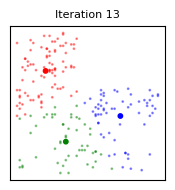

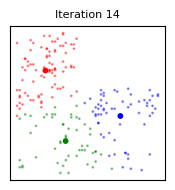

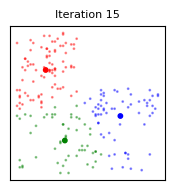

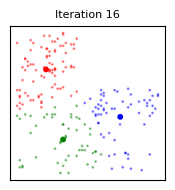

Convergence Reached at Iteration 16


In [18]:
iter(data1)

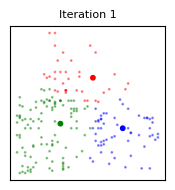

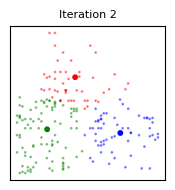

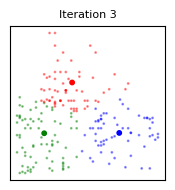

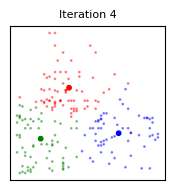

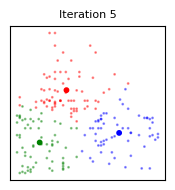

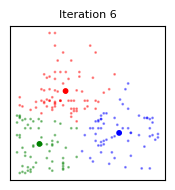

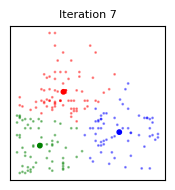

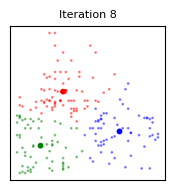

Convergence Reached at Iteration 8


In [20]:
iter(data2)

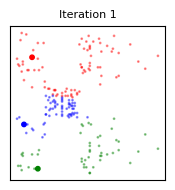

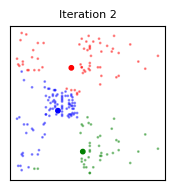

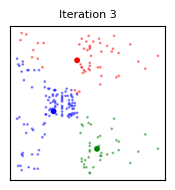

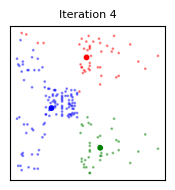

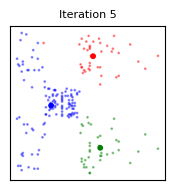

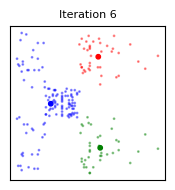

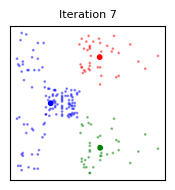

Convergence Reached at Iteration 7


In [24]:
iter(data3)